In [38]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.chebyshev as cheb

$$ x''+\omega^2 x=0$$

In [154]:
# choose points
omega = 1
N = 100
t = np.flip(cheb.chebgauss(N+1)[0])
matrix = np.zeros((N+1, N+1))
#build the polys at the points
cheb_poly = np.zeros((N+1, N+1))
cheb_der = np.zeros_like(cheb_poly)
cheb_der_der = np.zeros_like(cheb_poly)
# row is the order, column is the evaluation point
cheb_poly[0,:] = 1
cheb_poly[1,:] = t
cheb_der[1,:] = 1
for k in range(2,N+1):
    cheb_poly[k,:] = 2*t*cheb_poly[k-1,:] - cheb_poly[k-2,:]
    cheb_der[k,:] = 2*cheb_poly[k-1] + 2*t*cheb_der[k-1, :] - cheb_der[k-2, :]
    cheb_der_der[k,:] = 4*cheb_der[k-1]+2*t*cheb_der_der[k-1, :]-cheb_der_der[k-2, :]
#now formulate the equations
matrix[0,:] = np.transpose(cheb_poly[:,0])
matrix[1:-1, :] =np.transpose(cheb_der_der[:, 1:-1]+omega**2*cheb_poly[:,1:-1]*t[1:-1])
matrix[-1,:] = np.transpose(cheb_poly[:,-1])
RHS_vec = np.zeros(N+1)
RHS_vec[-1] = 1

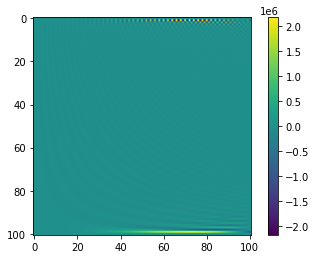

In [155]:
plt.imshow(matrix); plt.colorbar()

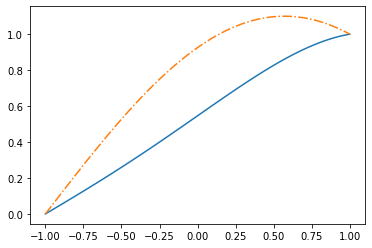

In [156]:
solution = np.linalg.solve(matrix, RHS_vec)
plt.plot(t, cheb.chebval(t, solution))
A = 1/2/np.cos(omega); B=1/2/np.sin(omega)
plt.plot(t, A*np.cos(omega*t)+B*np.sin(omega*t), '-.')





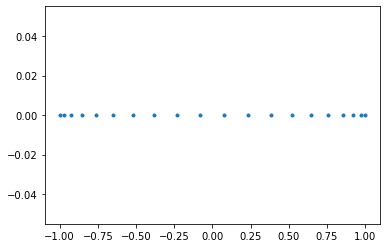

In [149]:
plt.plot(cheb.chebgauss(20)[0],np.zeros_like(cheb.chebgauss(20)[0]), '.')